<a href="https://colab.research.google.com/github/everestso/Fall24Spring25/blob/main/c167f24_TorchGrad_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TORCH Gradients

In [3]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=64e36428d3787f8675f22d6fd420bd4388f3a8f7ff59458dbdd1b5262d523df3
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [4]:
import torch
from torchviz import make_dot

In [5]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([7.0]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b

print(n)

tensor([1.], dtype=torch.float64, grad_fn=<AddBackward0>)


x1.data.item()=2.0
x2.data.item()=0.0
w1.data.item()=-3.0
w2.data.item()=1.0
b.data.item()=7.0
n.data.item()=1.0


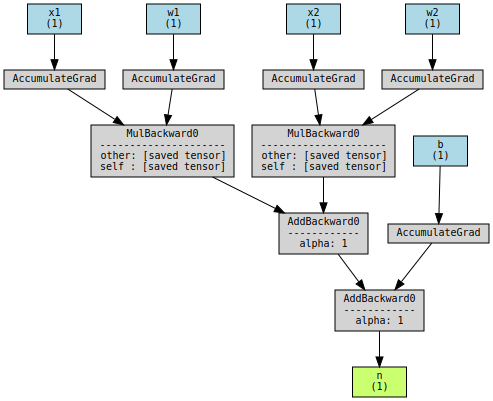

In [6]:
dot = make_dot(n, params={
    'x1': x1,
    'x2': x2,
    'w1': w1,
    'w2': w2,
    'b': b,
    'n': n
}, show_attrs=True)
print(f'{x1.data.item()=}')
print(f'{x2.data.item()=}')
print(f'{w1.data.item()=}')
print(f'{w2.data.item()=}')
print(f'{b.data.item()=}')
print(f'{n.data.item()=}')
dot.render("torch_graph", format="png")
dot

In [7]:
n.backward()

print('---')
print(f'{x1.grad.item()=}, {w1.data.item()=}')
print(f'{x2.grad.item()=}, {w2.data.item()=}')
print(f'{w1.grad.item()=}, {x1.data.item()=}')
print(f'{w2.grad.item()=}, {x2.data.item()=}')

---
x1.grad.item()=-3.0, w1.data.item()=-3.0
x2.grad.item()=1.0, w2.data.item()=1.0
w1.grad.item()=2.0, x1.data.item()=2.0
w2.grad.item()=0.0, x2.data.item()=0.0


## Example 2

In [51]:

x1 = torch.Tensor([-3.0]).double()                ; x1.requires_grad = True
w1 = torch.Tensor([3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([2.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([-7.0]).double()  ; b.requires_grad = True
n = w2*x1**2 + w1*x1 + b
xGrad = (2*x1*w2 + w1).data.item()

print(n.data.item())

2.0


x1.data.item()=-3.0
w1.data.item()=3.0
w2.data.item()=2.0
b.data.item()=-7.0
n.data.item()=2.0


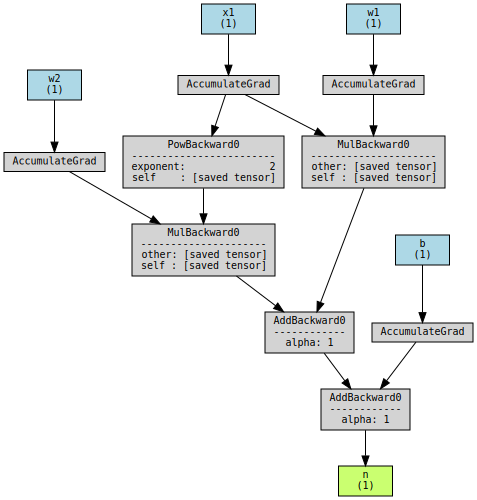

In [52]:
dot = make_dot(n, params={
    'x1': x1,
    'w1': w1,
    'w2': w2,
    'b': b,
    'n': n
}, show_attrs=True)
print(f'{x1.data.item()=}')
print(f'{w1.data.item()=}')
print(f'{w2.data.item()=}')
print(f'{b.data.item()=}')
print(f'{n.data.item()=}')
dot.render("torch_graph", format="png")
dot

In [53]:
n.backward(retain_graph=True)
print(f'{x1.data.item()=}')
print(f'{w1.data.item()=}')
print(f'{w2.data.item()=}')
print(f'{b.data.item()=}')
print(f'{n.data.item()=}')
print(f'{(w2*x1**2 + w1*x1 + b).data.item()=}')
print('---')
print('x1.grad', x1.grad.item(), f'{(w2*x1**2 + w1*x1 + b).data.item()=}')
print('w1.grad', w1.grad.item())
print('w2.grad', w2.grad.item())
print('b.grad', b.grad.item())

x1.data.item()=-3.0
w1.data.item()=3.0
w2.data.item()=2.0
b.data.item()=-7.0
n.data.item()=2.0
(w2*x1**2 + w1*x1 + b).data.item()=2.0
---
x1.grad -9.0 (w2*x1**2 + w1*x1 + b).data.item()=2.0
w1.grad -3.0
w2.grad 9.0
b.grad 1.0
